<a href="https://colab.research.google.com/github/pragmatic-philosopher09/Audio-Emotion-Analyzer-Through-Deep-Learning/blob/main/Phase_3_Building_CNN_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Core idea**
The key idea behind using CNNs for audio processing is that they are able to extract meaningful features from the raw audio signal by convolving the signal with a set of learned filters. These filters can be thought of as templates that are used to detect specific patterns or features in the audio signal.

# **EXISTING SYSTEM APPROACH**

1D CNN that operates directly on the raw audio signal. This approach has been used successfully for speech recognition tasks, where the CNN is trained to classify the audio signal into phoneme or word categories.

https://deepai.org/publication/1d-cnn-architectures-for-music-genre-classification

# **OUR APPROACH**

Our approach for using CNNs in audio processing is to represent the audio signal as a spectrogram, which is a visual representation of the frequency content of the signal over time. The spectrogram is then treated as an image, and a CNN is trained to classify it based on the features that it contains.



# **Importing the required Packages**

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# **Defining the plotter function to visualize the accuracy and loss graphs**

In [ ]:
def plotter(history):
  plt.figure()
  plt.plot(history.history['loss'],label='train loss')
  plt.plot(history.history['val_loss'],label='test loss')
  plt.xlabel('iterations')
  plt.ylabel('losses')
  plt.legend()
  plt.figure()
  plt.plot(history.history['accuracy'],label='train accuracy')
  plt.plot(history.history['val_accuracy'],label='test accuracy')
  plt.xlabel('iterations')
  plt.ylabel('accuracy')
  plt.legend()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Features_data = pd.read_csv('/content/drive/MyDrive/features_dataset.csv')
Features_data.head()
# Features.shape
Features_data.shape

Mounted at /content/drive


(1440, 163)

*Using shuffling to make the data less prone to error. Shuffling the data can help to reduce any bias that might be introduced if the data is ordered in some way.*




In [ ]:
from sklearn.utils import shuffle
temp_data = shuffle(Features_data)
# temp[:10]


In [ ]:
len(temp_data)

1440

In [ ]:
Features_data.shape

(1440, 163)

## **Splitting the data as 80-20 percent(Train and test data)**

In [ ]:
df = np.random.rand(len(temp_data)) < 0.8
train_data = temp_data[df]
test_data = temp_data[~df]


In [ ]:
train_features = train_data.iloc[:, :-1]
train_label = train_data.iloc[:, -1:]
test_features = test_data.iloc[:, :-1]
test_label = test_data.iloc[:, -1:]


## **LabelEncoder() is used to transform the string labels in y_train and y_test to numerical values. This is necessary because many machine learning algorithms cannot handle categorical data in their raw form.**

In [ ]:
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder

X_train = np.array(train_features)
y_train = np.array(train_label)
X_test = np.array(test_features)
y_test = np.array(test_label)

lb = LabelEncoder()

y_train = np_utils.to_categorical(lb.fit_transform(y_train))
y_test = np_utils.to_categorical(lb.fit_transform(y_test))


# **Reshaping the values as three dimensional features with value set to 1 in axix=2**

In [ ]:
x_train_cnn =np.expand_dims(X_train, axis=2)
x_test_cnn= np.expand_dims(X_test, axis=2)


In [ ]:
x_train_cnn.shape

(1175, 162, 1)

In [ ]:
x_test_cnn.shape

(265, 162, 1)

In [ ]:
y_test.shape

(265, 8)

In [ ]:
y_train.shape

(1175, 8)

In [ ]:
y_test

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [ ]:
x_train_cnn

array([[[1.01500000e+03],
        [1.71671549e-01],
        [6.33804202e-01],
        ...,
        [1.88070477e-03],
        [5.34235616e-04],
        [4.81145871e-05]],

       [[1.25200000e+03],
        [1.20157878e-01],
        [4.43277389e-01],
        ...,
        [2.66237112e-05],
        [1.40174534e-05],
        [7.03289800e-07]],

       [[3.05000000e+02],
        [2.58440936e-01],
        [5.93827784e-01],
        ...,
        [2.86984250e-05],
        [6.40975395e-06],
        [2.79997749e-07]],

       ...,

       [[8.03000000e+02],
        [2.22244828e-01],
        [6.18736744e-01],
        ...,
        [1.73705397e-03],
        [4.54042660e-04],
        [3.02950029e-05]],

       [[8.27000000e+02],
        [2.78184679e-01],
        [7.09976852e-01],
        ...,
        [8.95504782e-05],
        [3.22843262e-05],
        [3.95024517e-06]],

       [[4.91000000e+02],
        [2.09020544e-01],
        [6.90858603e-01],
        ...,
        [4.58817667e-05],
        [1.5451

# **Building the CNN layer**

In [ ]:
import tensorflow as tf
import keras
from keras import models
from keras import layers, optimizers


In [ ]:
# model.add(tf.keras.layers.Conv1D(256, 5,padding='same', input_shape=(x_traincnn.shape[1],1)))
# model.add(tf.keras.layers.Activation('relu'))

# model.add(tf.keras.layers.Conv1D(128, 5,padding='same'))
# model.add(tf.keras.layers.Activation('relu'))
# model.add(tf.keras.layers.Dropout(0.1))
# model.add(tf.keras.layers.MaxPooling1D(pool_size=(8)))

# model.add(tf.keras.layers.Conv1D(128, 5,padding='same',))
# model.add(tf.keras.layers.Activation('relu'))
# model.add(tf.keras.layers.Dropout(0.1))

# model.add(tf.keras.layers.Conv1D(64, 5,padding='same',))
# model.add(tf.keras.layers.Activation('relu'))

# model.add(tf.keras.layers.Flatten())
# model.add(tf.keras.layers.Dense(8))
# model.add(tf.keras.layers.Activation('softmax'))
# opt = keras.optimizers.RMSprop(lr=0.00001, decay=1e-6)


model = models.Sequential()
#aman copy the above commented code
#comment my lines
model.add(tf.keras.layers.Conv1D(64, kernel_size=(10), activation='relu', input_shape=(X_train.shape[1],1)))
model.add(tf.keras.layers.Conv1D(128, kernel_size=(10),activation='relu'))
model.add(tf.keras.layers.MaxPooling1D(pool_size=(8)))
model.add(tf.keras.layers.Dropout(0.4))

model.add(tf.keras.layers.Conv1D(128, kernel_size=(10),activation='relu'))
model.add(tf.keras.layers.MaxPooling1D(pool_size=(8)))
model.add(tf.keras.layers.Dropout(0.4))

model.add(tf.keras.layers.Conv1D(64, 5,padding='same',))
model.add(tf.keras.layers.Activation('relu'))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(8, activation='sigmoid'))
opt = keras.optimizers.Adam(lr=0.0001)
#finish here

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 153, 64)           704       
                                                                 
 conv1d_1 (Conv1D)           (None, 144, 128)          82048     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 18, 128)          0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 18, 128)           0         
                                                                 
 conv1d_2 (Conv1D)           (None, 9, 128)            163968    
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 1, 128)           0         
 1D)                                                    

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])

In [ ]:
history=model.fit(x_train_cnn, y_train, batch_size=256, epochs=1000, validation_data=(x_test_cnn, y_test))


Epoch 1/1000
5/5 [==============================] - 11s 321ms/step - loss: 4.2341 - accuracy: 0.1336 - val_loss: 2.1072 - val_accuracy: 0.1811
Epoch 2/1000
5/5 [==============================] - 0s 19ms/step - loss: 3.1332 - accuracy: 0.1098 - val_loss: 2.1368 - val_accuracy: 0.0943
Epoch 3/1000
5/5 [==============================] - 0s 21ms/step - loss: 2.6774 - accuracy: 0.1226 - val_loss: 2.0929 - val_accuracy: 0.0981
Epoch 4/1000
5/5 [==============================] - 0s 19ms/step - loss: 2.4919 - accuracy: 0.1430 - val_loss: 2.0528 - val_accuracy: 0.1962
Epoch 5/1000
5/5 [==============================] - 0s 22ms/step - loss: 2.3293 - accuracy: 0.1489 - val_loss: 2.0429 - val_accuracy: 0.1925
Epoch 6/1000
5/5 [==============================] - 0s 21ms/step - loss: 2.2112 - accuracy: 0.1532 - val_loss: 2.0384 - val_accuracy: 0.2000
Epoch 7/1000
5/5 [==============================] - 0s 21ms/step - loss: 2.2245 - accuracy: 0.1413 - val_loss: 2.0355 - val_accuracy: 0.2038
Epoch 8/100

In [ ]:
#aman dont run
model.save('CNN_model.h5')

## **Plotting the Loss and accuracy graph for the model.**

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 153, 64)           704       
                                                                 
 conv1d_1 (Conv1D)           (None, 144, 128)          82048     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 18, 128)          0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 18, 128)           0         
                                                                 
 conv1d_2 (Conv1D)           (None, 9, 128)            163968    
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 1, 128)           0         
 1D)                                                    

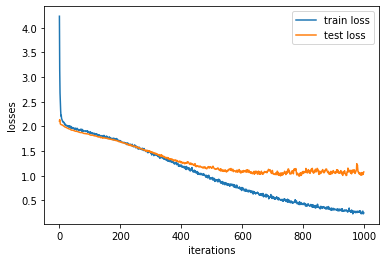

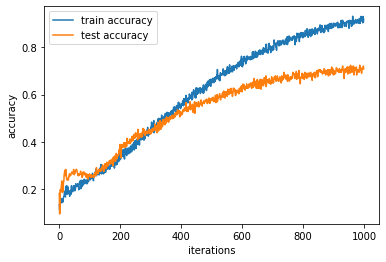

In [ ]:
plotter(history)

model.summary()
result = model.evaluate(x_test_cnn,y_test)
print(result)
     